In [45]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [46]:
by_year_df = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
by_year_df.set_index('Year', inplace = True) #set index as year
by_year_df.index= by_year_df.index.astype(str) #change to str for date time format
by_year_df.index = pd.to_datetime(by_year_df.index)#, format='%d/%m/%y') #convert index to correct date time for future slicing
total_immigration = by_year_df['1820-01-01':]
total_immigration.head()

,Number
Year,
1820-01-01,8385
1821-01-01,9127
1822-01-01,6911
1823-01-01,6354
1824-01-01,7912


# Initial Plot of Immigration 1820 - 2017
## World Wars Highlighted and October 29, 1929 (start of GD) Shown

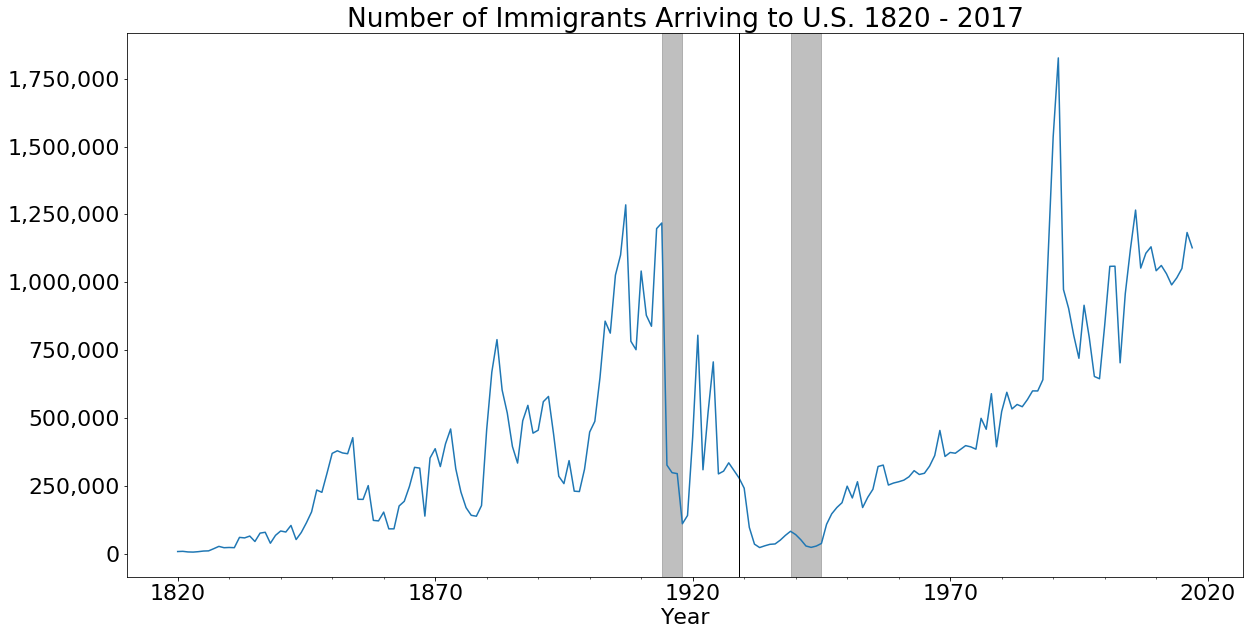

In [47]:
total_immigration.plot(figsize = (20,10), title= 'Number of Immigrants Arriving to U.S. 1820 - 2017', legend= False)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.axvline(pd.to_datetime('1929-10-29'), color='black', linestyle='-', lw=1)

plt.axvspan(pd.to_datetime('1939-09-01'), pd.to_datetime('1945-09-01'), alpha=0.5, color='grey')
plt.axvspan(pd.to_datetime('1914-07-28'), pd.to_datetime('1918-11-11'), alpha=0.5, color='grey')
# ax.yaxis.set_major_formatter(plt.ticker.StrMethodFormatter('{x:,.0f}'))

# Histogram - Number of Immigrants

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23adb978>]],
      dtype=object)

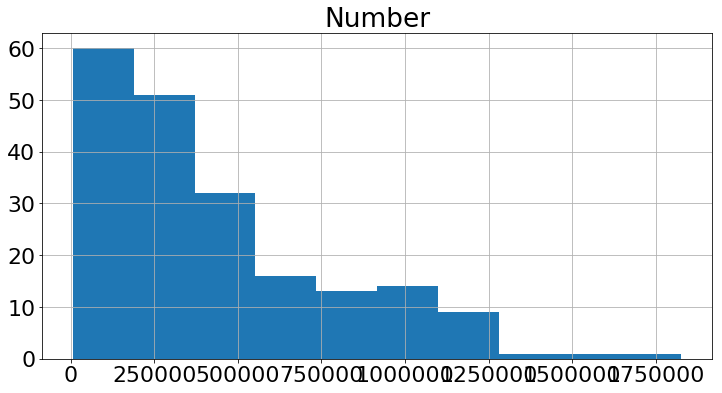

In [48]:
#not informative
total_immigration.hist(figsize = (12,6))

# Kernel Density Estimate plot 

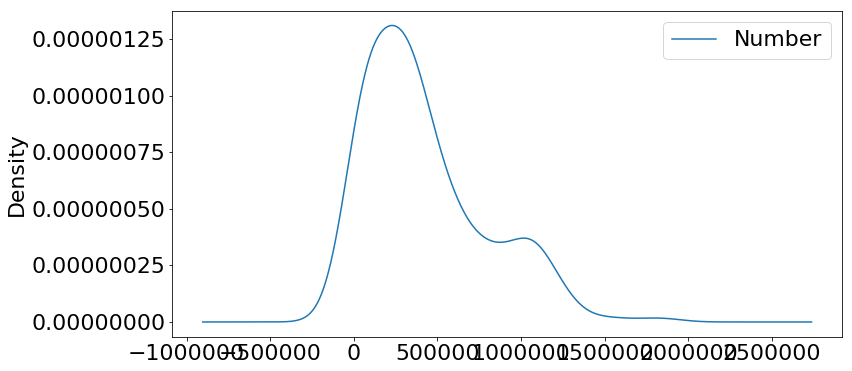

In [49]:
total_immigration.plot(kind='kde', figsize = (12,6))

# Graphing Rolling Mean and SD - window = 6

## Question to research:
- Which window to use? The more windows, the shorter the rolling mean and SD graphed

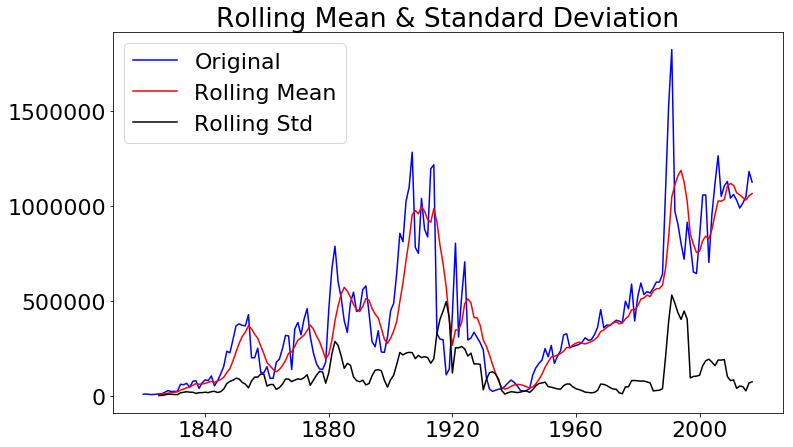

In [50]:
rolmean = total_immigration.rolling(window = 6, center = False).mean()
rolstd = total_immigration.rolling(window = 6, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Dickey-Fuller Test

## Question to research:
- How to interpret the Dickey Fuller numbers? / Results of Dickey-Fuller Test?

In [51]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(total_immigration)
# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value
# print(dftest)

# Checking to see if stationary

## 1. Function to check for Stationarity and Graph
### - Rolling Mean and SD with window = 32
### - Plot results of DF Test

In [107]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 20, center = False).mean()
    rolstd = TS.rolling(window = 20, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Number']) 
    
    #Plot rolling statistics:
#     ax = fig.plt.gca()
    
    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()  
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput2['Critical Value (%s)'%key] = value
    print (dfoutput2)

# 2. Run first stationarity check on initial data
### Results of Dickey-Fuller Test:
- Test Statistic                  -1.038272
### p-value                          0.739051
- #Lags Used                      15.000000
- Number of Observations Used    182.000000
- Critical Value (1%)             -3.466800
- Critical Value (5%)             -2.877555
- Critical Value (10%)            -2.575308


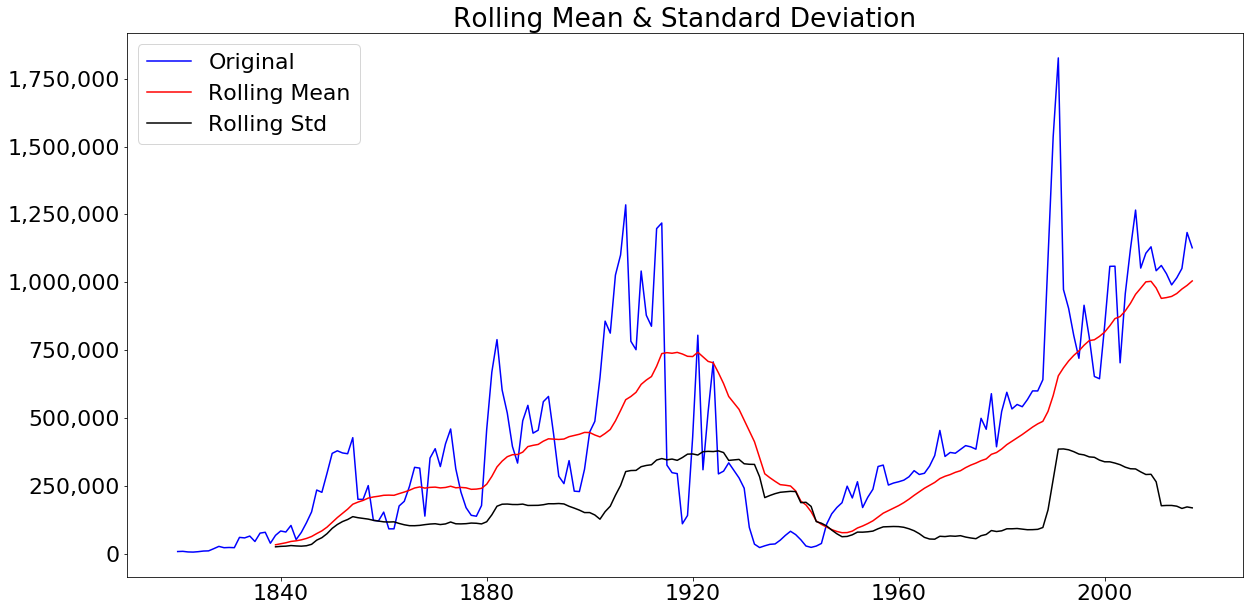

Results of Dickey-Fuller Test:
Test Statistic                  -1.038272
p-value                          0.739051
#Lags Used                      15.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


In [53]:
stationarity_check(total_immigration)

# 3. Log transformation to minimize non-stationarity
### Results of Dickey-Fuller Test:
- Test Statistic                  2.682961          
### p-value                           0.077033
- #Lags Used                      7.000000
- Number of Observations Used    190.000000
- Critical Value (1%)             -3.465244
- Critical Value (5%)             -2.876875
- Critical Value (10%)            -2.574945

In [54]:
import numpy as np
index = total_immigration.index

In [55]:
type(total_immigration)

pandas.core.frame.DataFrame

In [56]:
test = total_immigration.Number
type(test)

pandas.core.series.Series

In [57]:
immigration_array = test.as_matrix() #convert to numpy array
# immigration_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [58]:
data = pd.Series(np.log(immigration_array), index=index)
# data

Text(0, 0.5, 'log(Total_immigration_by_year)')

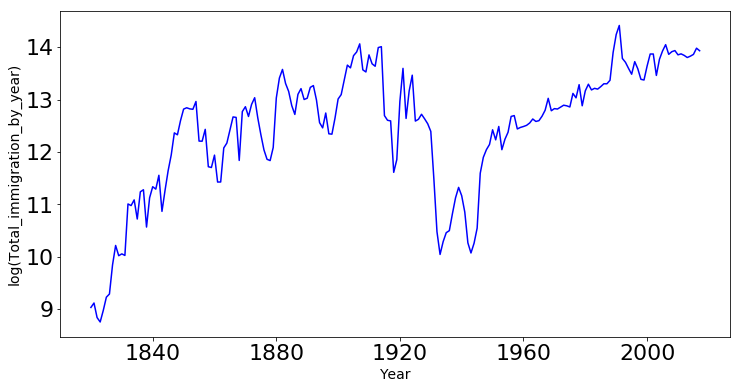

In [59]:
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("log(Total_immigration_by_year)", fontsize=14)
# plt.show()

In [60]:
data_df = data.to_frame()
data_df = data_df.rename(index=str, columns={0:'Number'})
# data_df

In [61]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-2.682960863472633, 0.0770334792303962, 7, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 122.4391885939828)


In [62]:
dfoutput

Test Statistic                  -2.682961
p-value                          0.077033
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64

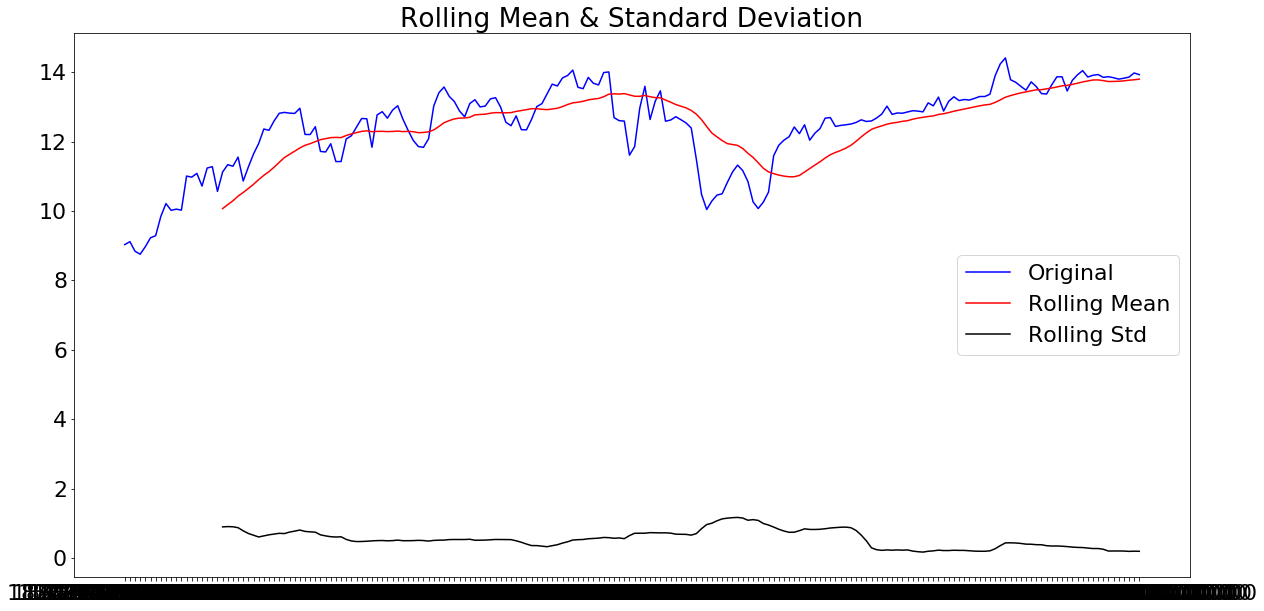

Results of Dickey-Fuller Test:
Test Statistic                  -2.682961
p-value                          0.077033
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [63]:
stationarity_check(data_df)

# 4. Square Root transformation to minimize non-stationarity

Text(0, 0.5, 'sqrt(total_immigration)')

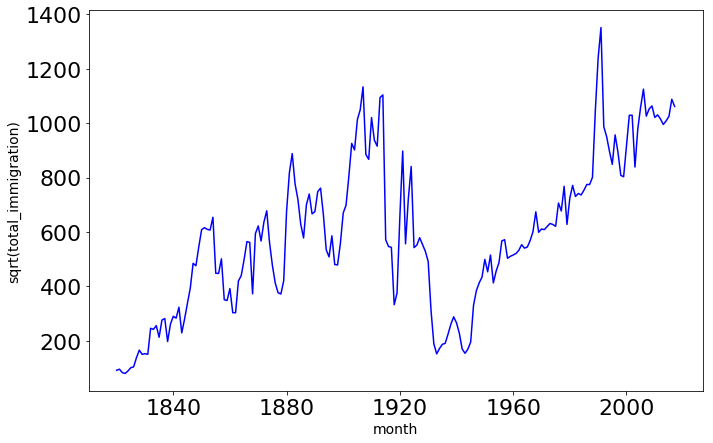

In [64]:
data_sqrt = pd.Series(np.sqrt(immigration_array), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data_sqrt, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(total_immigration)", fontsize=14)


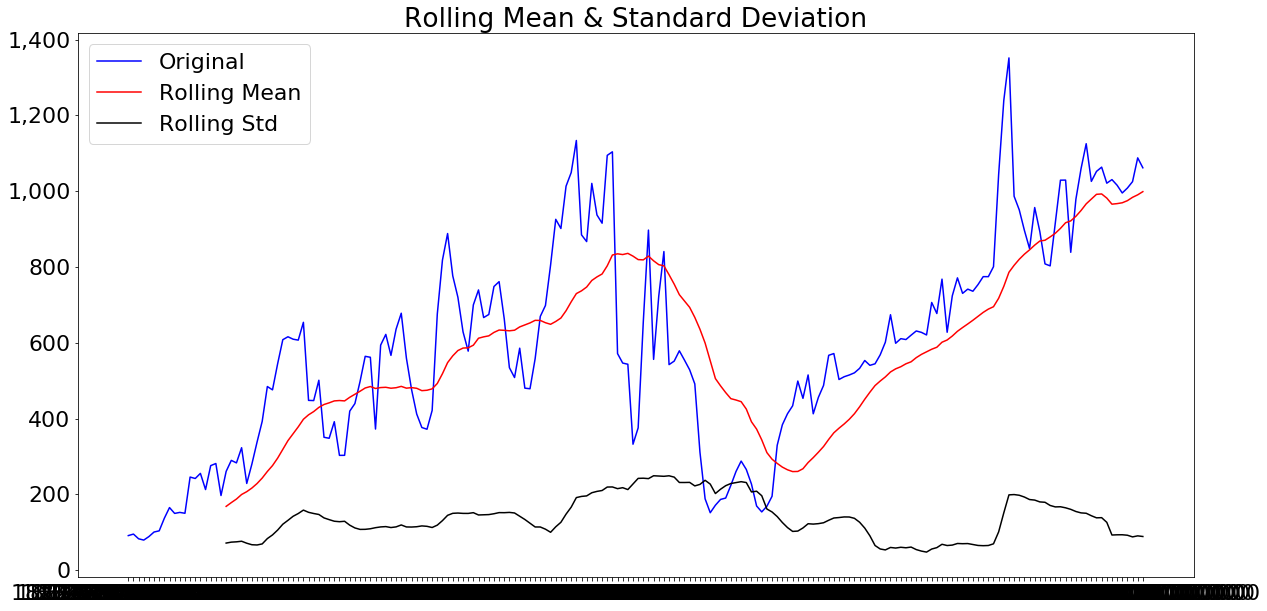

Results of Dickey-Fuller Test:
Test Statistic                  -1.662116
p-value                          0.450729
#Lags Used                       8.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [65]:
data_sqrt_df = data_sqrt.to_frame()
data_sqrt_df = data_sqrt_df.rename(index=str, columns={0:'Number'})

stationarity_check(data_sqrt_df)

# 5. Subtracting the rolling mean

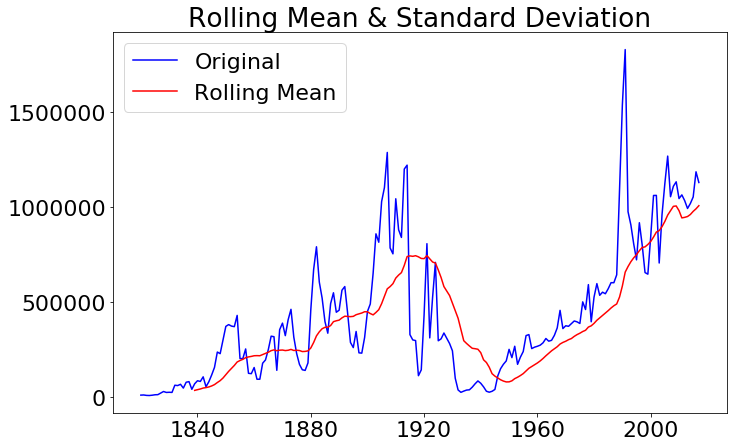

In [66]:
rolmean = total_immigration.rolling(window = 20).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [67]:
data_minus_rolmean = total_immigration - rolmean
# data_minus_rolmean.head(15)

In [68]:
data_minus_rolmean.dropna(inplace=True)

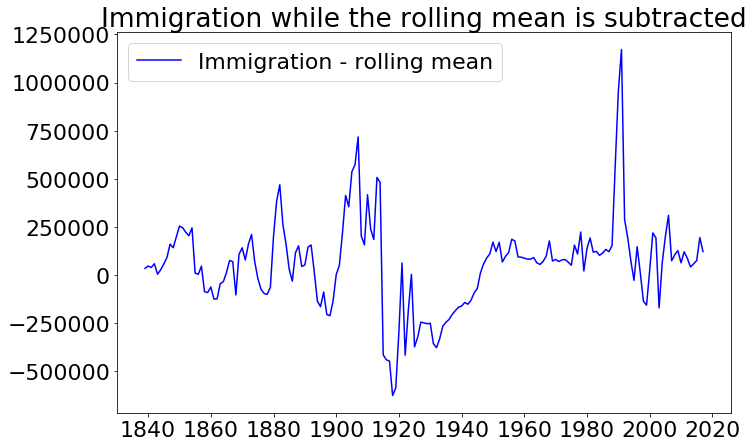

In [69]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the rolling mean is subtracted')
plt.show(block=False)

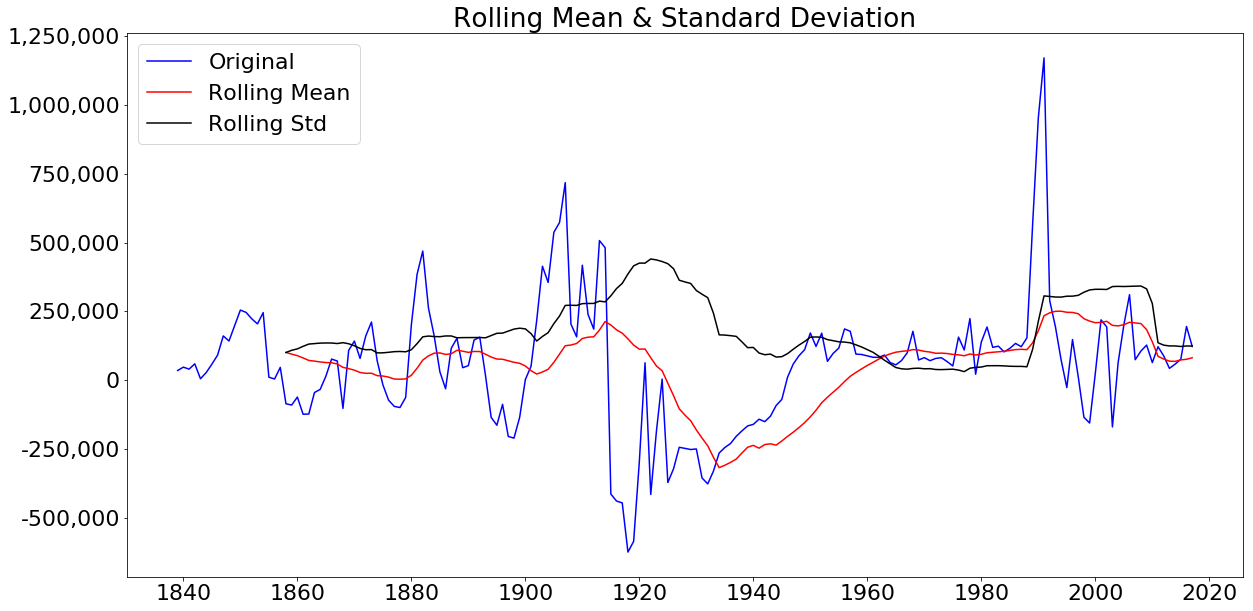

Results of Dickey-Fuller Test:
Test Statistic                  -2.916354
p-value                          0.043479
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [70]:
stationarity_check(data_minus_rolmean)

# 6. The weighted rolling mean / weighted moving average
- More recent values are given a higher weight
- Below using Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor
    - the parameter ‘halflife’ is used to define the amount of exponential decay. 
    - Other parameters like span and center of mass can also be used to define decay
    - more info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

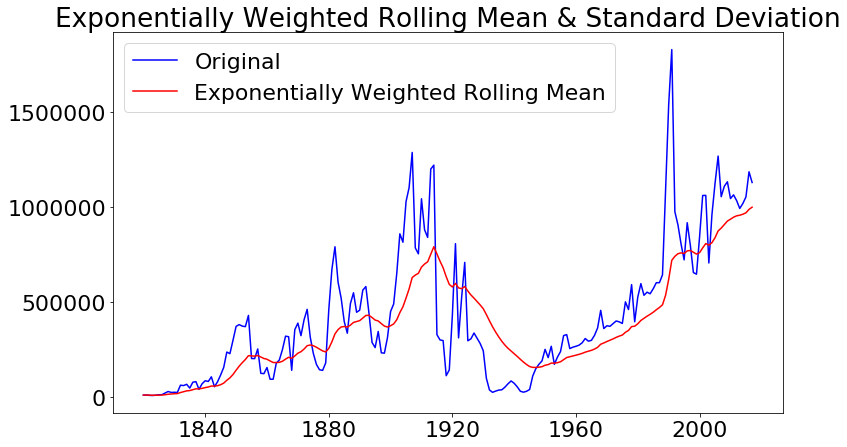

In [71]:
exp_rolmean = total_immigration.ewm(halflife = 8).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# 7. Subtract the Exponentially Weighted Moving Average from the Original Data

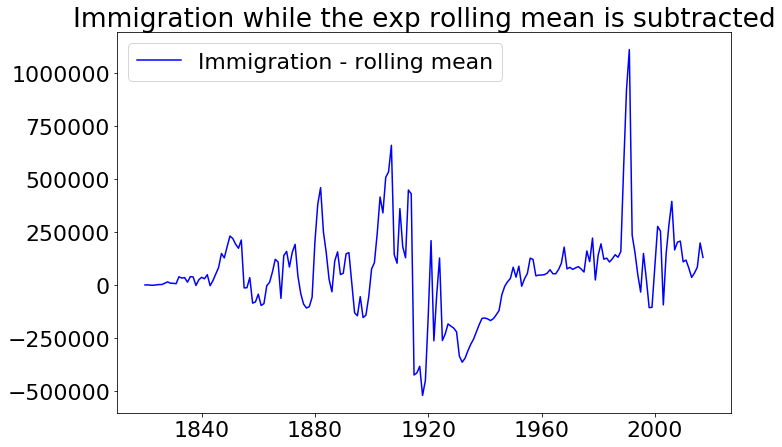

In [72]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = total_immigration - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the exp rolling mean is subtracted')
plt.show(block=False)

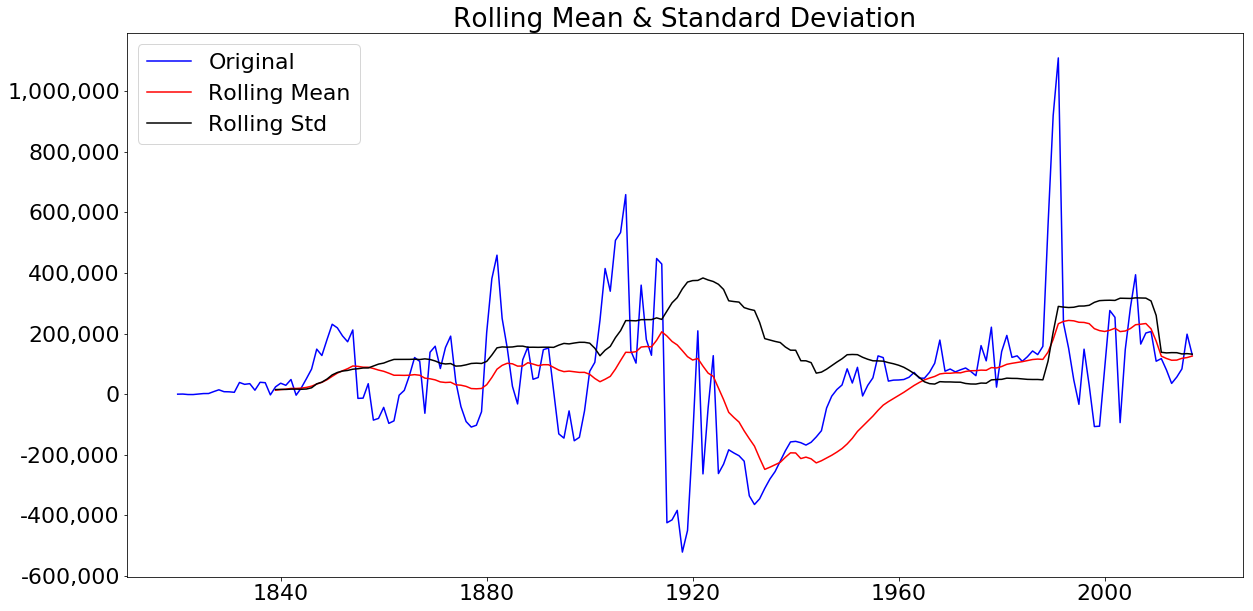

Results of Dickey-Fuller Test:
Test Statistic                  -2.385038
p-value                          0.146004
#Lags Used                      15.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


In [73]:
stationarity_check(data_minus_exp_rolmean)

# Differencing
- deal with both trend and seasonality 
- take the difference of an observation at a particular time instant with that at the previous instant (i.e. a co-called 1-period "lag")
## Question to research:
- How do you when you've differenced enough?

# 8.Use the new data where exp rolling mean is subtracted and difference it by 15 periods

In [94]:
#twelve period lag
data_diff = data_minus_exp_rolmean.diff(periods=15)
data_diff.head(20)

,Number
Year,
1820-01-01,NaN
1821-01-01,NaN
1822-01-01,NaN
1823-01-01,NaN
1824-01-01,NaN
1825-01-01,NaN
1826-01-01,NaN
1827-01-01,NaN
1828-01-01,NaN


In [75]:
data_diff.notnull().sum()

Number    178
dtype: int64

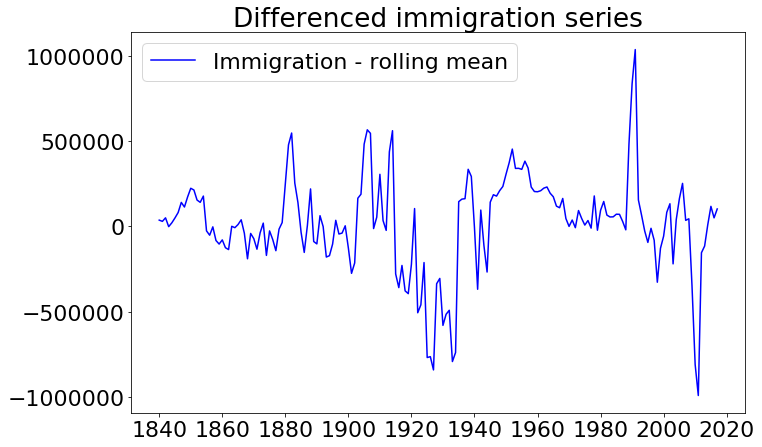

In [76]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)

In [95]:
data_droppedna= data_diff.dropna()


In [96]:
# data_droppedna#

In [97]:
# data_diff = data_droppedna.to_frame()
data_diff = data_droppedna.rename(index=str, columns={0:'Number'})
# data_diff

In [98]:
data_diff.index = by_year_df['1835':].index
data_diff.index

DatetimeIndex(['1835-01-01', '1836-01-01', '1837-01-01', '1838-01-01',
               '1839-01-01', '1840-01-01', '1841-01-01', '1842-01-01',
               '1843-01-01', '1844-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=183, freq=None)

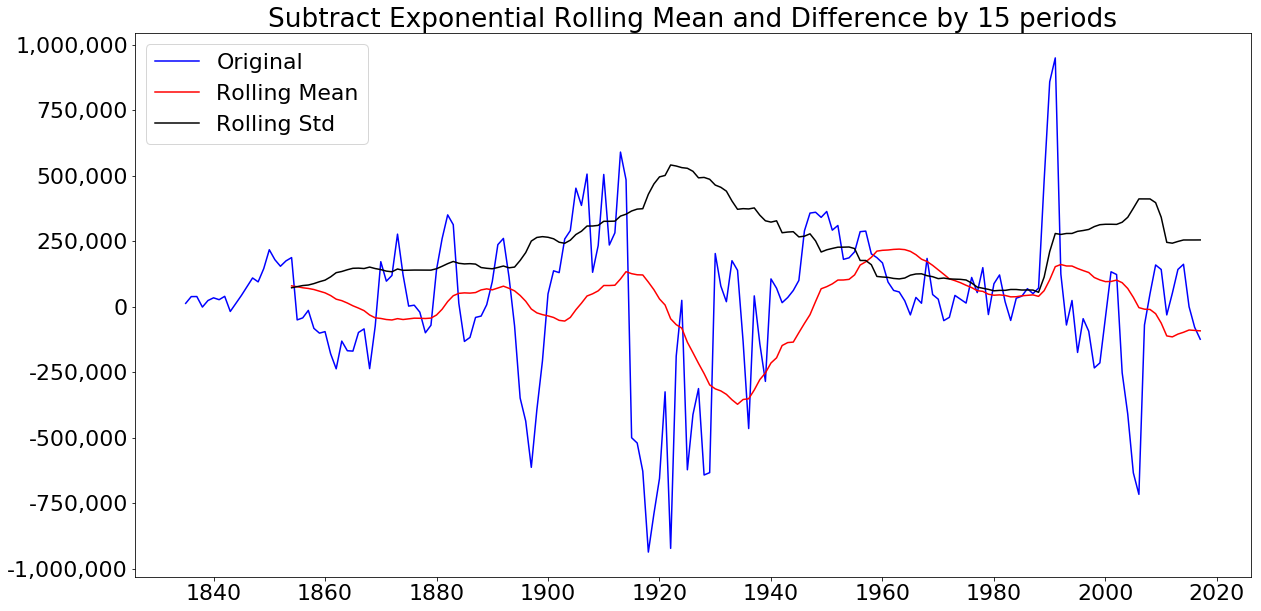

Results of Dickey-Fuller Test:
Test Statistic                  -4.810659
p-value                          0.000052
#Lags Used                      13.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


In [102]:
stationarity_check(data_diff)

# 9. Use the data where rolling mean is subtracted and difference it by 20 periods

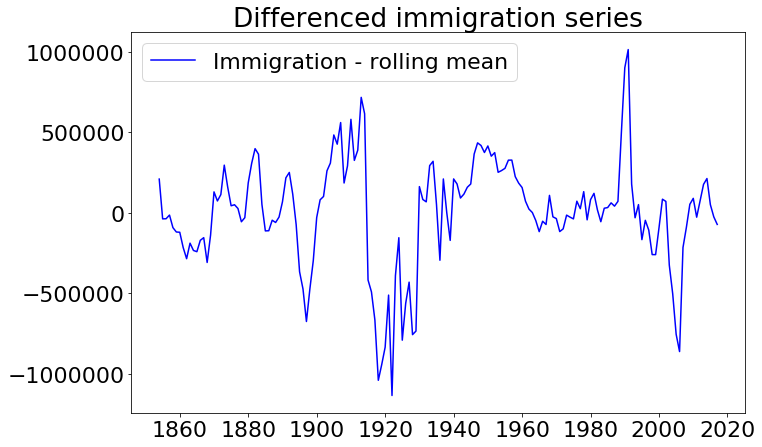

In [113]:

data_diff2 = data_minus_rolmean.diff(periods=15)
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff2, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)


In [104]:
data_droppedna2= data_diff2.dropna()

In [114]:
data_diff2 = data_droppedna2.rename(index=str, columns={0:'Number'})
# data_diff2.head()
data_diff2.index = by_year_df['1854':].index
# data_diff2.index

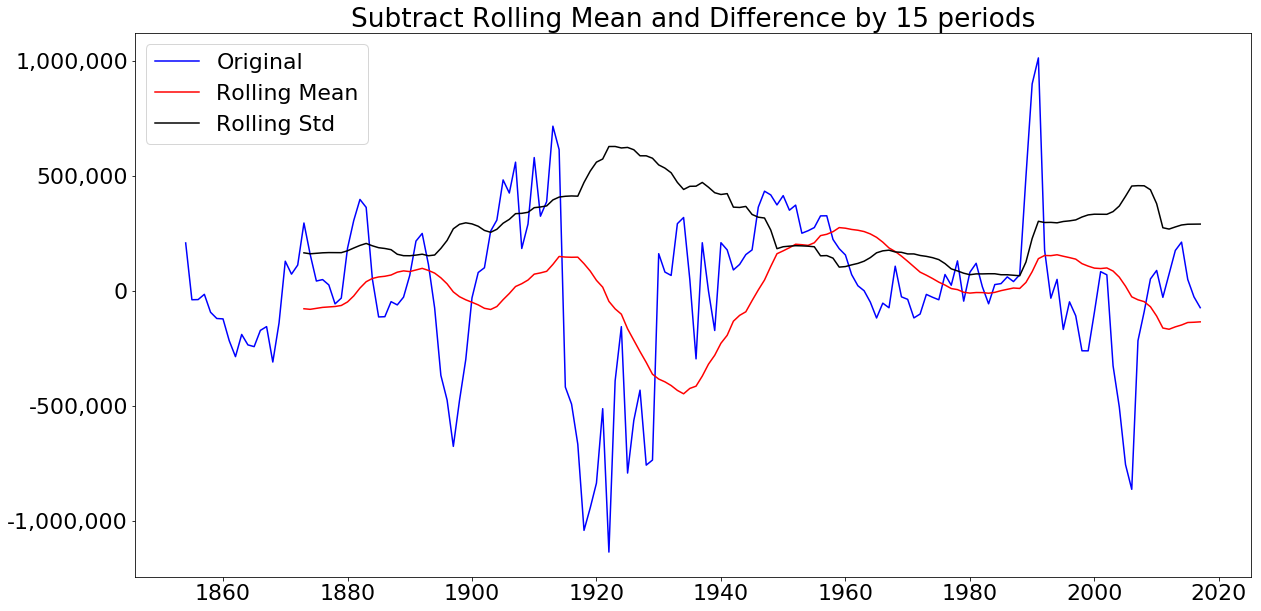

Results of Dickey-Fuller Test:
Test Statistic                  -4.947607
p-value                          0.000028
#Lags Used                      13.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [115]:
stationarity_check(data_diff2)